In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

**Problem Definition**

Cancer is one of the leading causes of death worldwide. Therefore, understanding the factors that influence cancer outcomes can help in improving treatment strategies and patient care. In this case study, we focus on analyzing a dataset of cancer patients to uncover insights that can aid in better understanding the disease and its treatment.

**Objective:** To identify patterns and correlations in the dataset that can help in predicting patient outcomes and identifying risk factors associated with cancer progression.

**Data Preparation & Preprocessing**

In [2]:
from google.colab import files
upload = files.upload()

Saving cancer_patient_datasets.csv to cancer_patient_datasets.csv


In [3]:
df = pd.read_csv('cancer_patient_datasets.csv')
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.shape

(1000, 25)

In [5]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [8]:
df.isnull().sum()

,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0
Balanced Diet,0


In [9]:
df['Level_code'] = df['Level'].astype('category').cat.codes
#verify the conversion
print(df[['Level','Level_code']].head())

    Level  Level_code
0     Low           1
1  Medium           2
2    High           0
3    High           0
4    High           0


**Exploratory Data Analysis**

In [10]:
print(df[['Age', 'Air Pollution']].describe())

               Age  Air Pollution
count  1000.000000      1000.0000
mean     37.174000         3.8400
std      12.005493         2.0304
min      14.000000         1.0000
25%      27.750000         2.0000
50%      36.000000         3.0000
75%      45.000000         6.0000
max      73.000000         8.0000


In [11]:
mode_age = stats.mode(df['Age'])[0]
print(f"Mode Age: {mode_age}")

Mode Age: 35


In [12]:
mode_air_pollution = stats.mode(df['Air Pollution'])[0]
print(f"Mode Air Pollution: {mode_air_pollution}")

Mode Air Pollution: 6


In [13]:
from scipy.stats import skew, kurtosis
age_skewness = skew(df['Age'])
age_kurtosis = kurtosis(df['Age'])
print(f"skewness is: {age_skewness}")
print(f"kurtosis is: {age_kurtosis}")

skewness is: 0.5502689405577516
kurtosis is: 0.05324893367768002


In [14]:
from scipy.stats import skew, kurtosis
air_skewness = skew(df['Air Pollution'])
air_kurtosis = kurtosis(df['Air Pollution'])
print(f"skewness is: {air_skewness}")
print(f"kurtosis is: {air_kurtosis}")

skewness is: 0.12526335148521664
kurtosis is: -1.3859183098693584


In [15]:
age_range = df['Age'].max() - df['Age'].min()
age_variance = df['Age'].var()
age_std = df['Age'].std()

print(f"Range: {age_range}")
print(f"Variance: {age_variance}")
print(f"Standard Deviation: {age_std}")

Range: 59
Variance: 144.13185585585614
Standard Deviation: 12.00549273690406


In [16]:
air_range = df['Air Pollution'].max() - df['Air Pollution'].min()
air_variance = df['Air Pollution'].var()
air_std = df['Air Pollution'].std()

print(f"Range: {air_range}")
print(f"Variance: {air_variance}")
print(f"Standard Deviation: {air_std}")

Range: 7
Variance: 4.122522522522477
Standard Deviation: 2.030399596759829


 **Statistical Analysis, Hypothesis Testing & A/B Testing**

***Correlation Analysis***

In [17]:
correlation_matrix = df[['Age', 'Weight Loss']].corr()
correlation_matrix

,Age,Weight Loss
Age,1.000000,0.106946
Weight Loss,0.106946,1.000000


In [19]:
correlation_matrix1 = df[['Air Pollution', 'chronic Lung Disease']].corr()
correlation_matrix1

,Air Pollution,chronic Lung Disease
Air Pollution,1.000000,0.626701
chronic Lung Disease,0.626701,1.000000


In [20]:
correlation_matrix2 = df[['Gender', 'Genetic Risk']].corr()
correlation_matrix2

,Gender,Genetic Risk
Gender,1.000000,-0.222727
Genetic Risk,-0.222727,1.000000


In [24]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix3 = df_numeric.corr()
correlation_matrix3

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_code
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.042631
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,0.086222
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,-0.577269
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,-0.434071
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,-0.264926
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,-0.363748
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,-0.423382
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,-0.432405
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,-0.618781
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,-0.561961


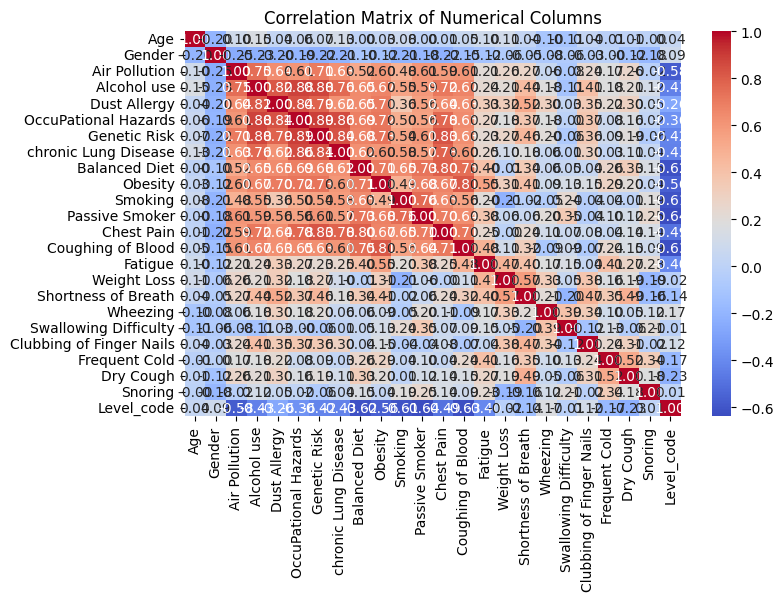

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix3,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

***A/B Testing***

In [27]:
group_a = df[df['Level'] == 'Low']
group_b = df[df['Level'] == 'Medium']
group_c = df[df['Level'] == 'High']
# Display group sizes
print(f"Low size: {len(group_a)}")
print(f"Medium size: {len(group_b)}")
print(f"High size: {len(group_c)}")

Low size: 303
Medium size: 332
High size: 365


<ipython-input-32-d2cb5b375085>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age', y='Level', palette='pastel')


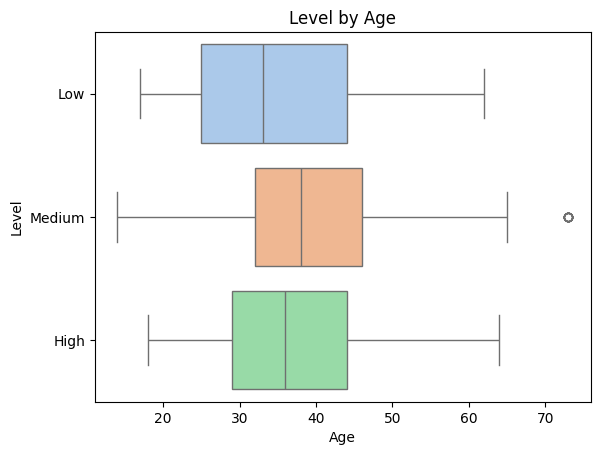

In [32]:
sns.boxplot(data=df, x='Age', y='Level', palette='pastel')
plt.title("Level by Age")
plt.xlabel("Age")
plt.ylabel("Level")
plt.show()

<ipython-input-34-2ac910f37473>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y='Level', palette='pastel')


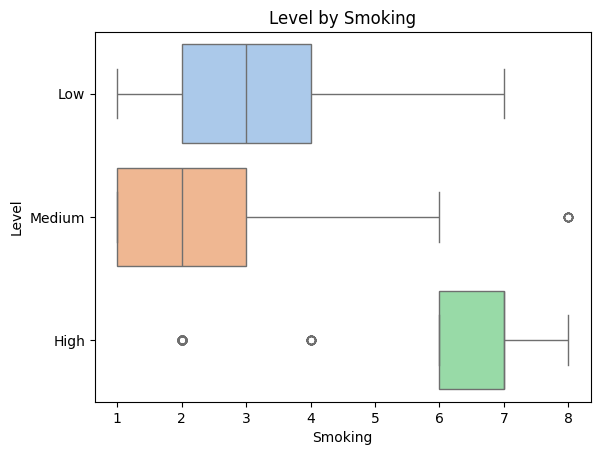

In [34]:
sns.boxplot(data=df, x='Smoking', y='Level', palette='pastel')
plt.title("Level by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Level")
plt.show()

***Hypothesis Testing***

In [39]:
from scipy.stats import ttest_ind
group_1 = df[df['Level_code'] == 0]
group_2 = df[df['Level_code'] == 1]
group_3 = df[df['Level_code'] == 2]

t_stat, p_value = ttest_ind(group_1['Level_code'], group_2['Level_code'])

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference in High and Low Levels")
else:
    print("No significant difference in High and Low Levels")

T-Statistic: -inf
P-Value: 0.0
Significant difference in High and Low Levels


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


***Statistical Analysis***

In [35]:
contingency_table = pd.crosstab(df['Obesity'], df['Shortness of Breath'])
contingency_table

Shortness of Breath,1,2,3,4,5,6,7,9
Obesity,,,,,,,,
1,20,30,20,0,0,0,0,0
2,50,10,30,0,0,10,40,0
3,10,72,21,10,29,51,0,0
4,0,71,20,20,0,70,10,0
5,0,0,10,0,0,10,0,0
6,0,20,0,0,0,0,10,0
7,0,40,39,60,58,60,29,70


In [37]:
import scipy.stats as stats

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

if p_value < 0.05:
    print("There is a significant relationship between obesity and shortness of breath.")
else:
    print("No significant relationship between obesity and shortness of breath.")

Chi-Square Statistic: 802.1557837223144
P-Value: 3.27107193347408e-141
Degrees of Freedom: 42
Expected Frequencies Table:
[[ 5.6   17.01   9.8    6.3    6.09  14.07   6.23   4.9  ]
 [11.2   34.02  19.6   12.6   12.18  28.14  12.46   9.8  ]
 [15.44  46.899 27.02  17.37  16.791 38.793 17.177 13.51 ]
 [15.28  46.413 26.74  17.19  16.617 38.391 16.999 13.37 ]
 [ 1.6    4.86   2.8    1.8    1.74   4.02   1.78   1.4  ]
 [ 2.4    7.29   4.2    2.7    2.61   6.03   2.67   2.1  ]
 [28.48  86.508 49.84  32.04  30.972 71.556 31.684 24.92 ]]
There is a significant relationship between obesity and shortness of breath.


In [40]:
contingency_tab = pd.crosstab(df['Obesity'], df['Balanced Diet'])
contingency_tab

Balanced Diet,1,2,3,4,5,6,7
Obesity,,,,,,,
1,20,30,0,10,10,0,0
2,20,20,40,0,10,30,20
3,0,20,123,31,0,0,19
4,0,161,10,0,10,10,0
5,0,0,0,0,10,10,0
6,0,0,0,20,0,10,0
7,0,0,0,0,0,99,257


In [41]:
import scipy.stats as stats

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_tab)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

if p_value < 0.05:
    print("There is a significant relationship between obesity and balanced diet.")
else:
    print("No significant relationship between obesity and balanced diet.")

Chi-Square Statistic: 1828.3206008940886
P-Value: 0.0
Degrees of Freedom: 36
Expected Frequencies Table:
[[  2.8    16.17   12.11    4.27    2.8    11.13   20.72 ]
 [  5.6    32.34   24.22    8.54    5.6    22.26   41.44 ]
 [  7.72   44.583  33.389  11.773   7.72   30.687  57.128]
 [  7.64   44.121  33.043  11.651   7.64   30.369  56.536]
 [  0.8     4.62    3.46    1.22    0.8     3.18    5.92 ]
 [  1.2     6.93    5.19    1.83    1.2     4.77    8.88 ]
 [ 14.24   82.236  61.588  21.716  14.24   56.604 105.376]]
There is a significant relationship between obesity and balanced diet.


**Results and Insights**

The mode age and air pollution is 35 and 6, respectively. This means that patients aged 35 and those living in highly polluted areas are more likely to present cancer symptoms. Therefore, patients in these conditions should be encouraged to attend regular testing and monitoring so that any cancer disease progression is detected and managed early.

The skewness and kurtosis for age was 0.5502689405577516 and 0.05324893367768002, respectively. The positive skewness of the data shows that there are more younger than older people in the dataset, which might lead to biased results. Therefore, it would be best to evaluate a revised dataset with more older people to ensure quality data analysis. On the other hand, the kurtosis of 0.0532 is close to 0, showing it is very close to a normal distribution. Thus, the outliers do not significantly affect the overall distribution.

For the air pollution, the skewness was 0.12526335148521664 while the
kurtosis was -1.3859183098693584. This skewness value shows that the distribution of air pollution levels is slightly positively skewed. This can be due to industrialization and urbanization that lowers the air quality, predisposing the patients to cancer disease progression. The correlation of air pollution and chronic lung disease is 0.626701, further supporting the negative impact of poor air quality on the human body. In addition the chi square statistic revealed a significant relationship between obesity and shortness of breath.


***Recommendations***

Cancer is more likely to progress among patients living in poor air conditioned areas. Therefore,policies requiring air filtering should be implemented to ensure industries release clean air into the atmosphere. Similarly, patients should be encouraged to attend annual checkups, especially as they approach age 35.

Other diseases like obesity should also be managed effectively through diet and exercise. For instance, the chi square test between obesity and balanced diet reveals a significant relationship between balanced diet and obesity, given the p-value of 0.0, which is less than 0.05. This shows that obesity can be managed through adopting a balanced diet.


